In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

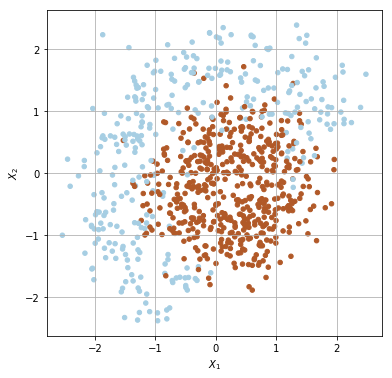

In [144]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('target.npy', 'rb') as fin:
    y = np.load(fin)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.xlabel('$X_1$'); plt.ylabel('$X_2$')
plt.grid(); plt.show()

In [153]:
def expand(X):
    return PolynomialFeatures(degree=2).fit_transform(X)

In [154]:
X_expanded = expand(X)
print(X_expanded.shape)

(826, 6)


In [155]:
def probability(X, w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x), see description above
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """
    return  1 / (1 + np.exp(-np.matmul(X,w)))

In [156]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n,6], target vector [n] of 1/0,
    and weight vector w [6], compute scalar loss function using formula above.
    """
    n = X.shape[0]
    return -sum(y*np.log(probability(X,w)) + (1-y)*np.log(1 - probability(X,w)))/n

In [157]:
def compute_grad(X, y, w):
    """
    Given feature matrix X [n,6], target vector [n] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    """
    n = X.shape[0]
    g =  (np.dot(probability(X, w)-y ,X)) / n
    return g

In [168]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    plt.figure(figsize=(12,5))
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$X_1$'); plt.ylabel('$X_2$')
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Iteration'); plt.ylabel('Loss')
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

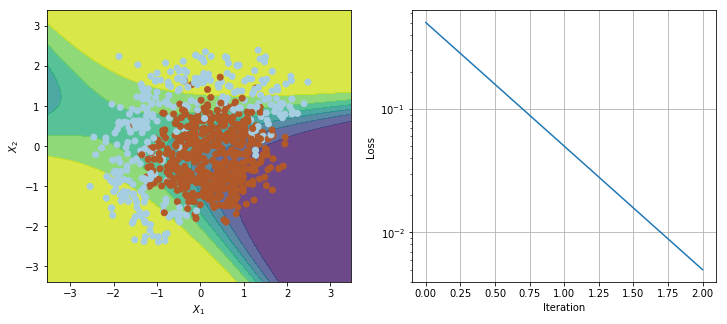

In [170]:
dummy_weights = np.random.uniform(low=-1, high=1, size=X_expanded.shape[1])
visualize(X, y, dummy_weights, [0.5, 0.05, 0.005])

In [277]:
n_iter = 1000

<Figure size 864x360 with 0 Axes>

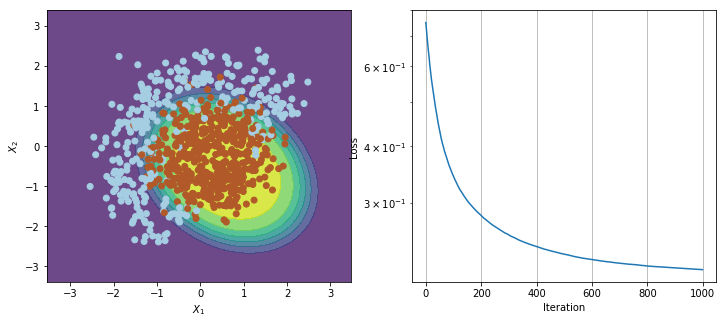

[ 3.48589878  1.32610145 -1.3535123  -1.45204506 -0.74440942 -1.50409358]


In [278]:
# please use np.random.seed(42), eta=0.1, n_iter=100 and batch_size=4 for deterministic results

np.random.seed(42)
w = np.random.uniform(low=-1, high=1, size=X_expanded.shape[1])

eta= 0.1 # learning rate

batch_size = 100
mb_loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    mb_loss[i] = compute_loss(X_expanded, y, w)
    
    w = w - eta*compute_grad(X_expanded[ind, :], y[ind], w)

visualize(X, y, w, mb_loss)
print(w)

<Figure size 864x360 with 0 Axes>

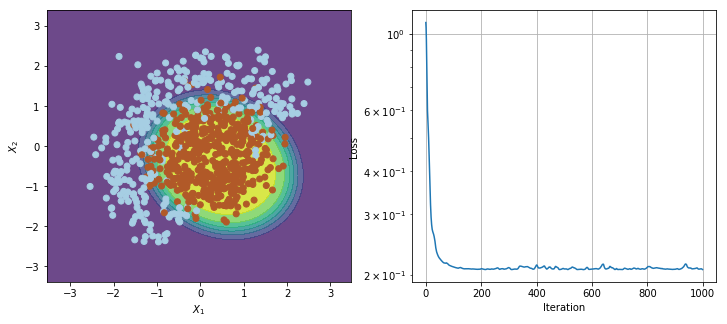

Final weigts: [ 4.56169412  1.58838766 -1.62750004 -1.98608195 -0.6160085  -2.06302949]


<Figure size 432x288 with 0 Axes>

In [279]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

h = np.zeros_like(w) # gradient vector with momentum term

η = 0.1 # learning rate
α = 0.9 # Momentum

batch_size = 50 # Batch size

# Define the vector to store the values of the loss function for plotting
momentum_loss = np.zeros(n_iter)

# Start a new figure
plt.figure(figsize=(12, 5))

# Iterate through the loss function and update the weights vector on each iteration
for i in range(n_iter):
    # Choose the random indicies of the training examples
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    # Compute the loss function value
    momentum_loss[i] = compute_loss(X_expanded, y, w)

    # Compute the approximation of the gradient vector based on the current batch
    g = compute_grad(X_expanded[ind, :], y[ind], w)

    # Compute the gradient with momentum 
    h = α*h + η*g
    # Update weight vector by subtracting the gradient with the momentum
    w = w - h

visualize(X, y, w, momentum_loss)
print('Final weigts:', w)

#[ 4.48576749  1.56981133 -1.45100899 -1.84156623 -0.68570656 -2.04725838]
plt.clf()


<Figure size 864x360 with 0 Axes>

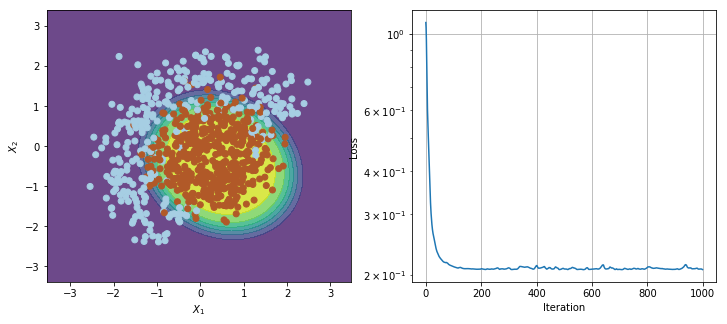

Final weigts: [ 4.55382096  1.58409141 -1.62881667 -1.99591993 -0.61989428 -2.06419231]


<Figure size 432x288 with 0 Axes>

In [280]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

h = np.zeros_like(w) # gradient vector with momentum term

η = 0.1 # learning rate
α = 0.9 # Momentum

batch_size = 50 # Batch size

# Define the vector to store the values of the loss function for plotting
nesterov_momentum_loss = np.zeros(n_iter)

# Start a new figure
plt.figure(figsize=(12, 5))

# Iterate through the loss function and update the weights vector on each iteration
for i in range(n_iter):
    # Choose the random indicies of the training examples
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    # Compute the loss function value
    nesterov_momentum_loss[i] = compute_loss(X_expanded, y, w)

    # Compute the approximation of the gradient vector based on the current batch
    g = compute_grad(X_expanded[ind, :], y[ind], w - α*h)

    # Compute the gradient with momentum 
    h = α*h + η*g
    # Update weight vector by subtracting the gradient with the momentum
    w = w - h

visualize(X, y, w, nesterov_momentum_loss)
print('Final weigts:', w)

# [ 4.48097379  1.56535413 -1.45691541 -1.83597497 -0.68090021 -2.03605128]
plt.clf()


<Figure size 864x360 with 0 Axes>

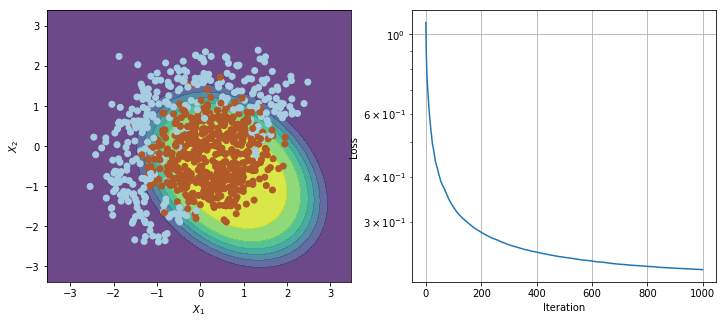

Final weigts: [ 3.14844941  1.35891896 -1.29020673 -1.3228176  -0.7671276  -1.23983105]


<Figure size 432x288 with 0 Axes>

In [285]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

G = np.zeros_like(w) # axillary vector

η = 0.1 # learning rate
ϵ = 1e-9 # division by zero avoidance term

batch_size = 50 # Batch size

# Define the vector to store the values of the loss function for plotting
adagrad_loss = np.zeros(n_iter)

# Start a new figure
plt.figure(figsize=(12, 5))

# Iterate through the loss function and update the weights vector on each iteration
for i in range(n_iter):
    # Choose the random indicies of the training examples
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    # Compute the loss function value
    adagrad_loss[i] = compute_loss(X_expanded, y, w)

    # Compute the approximation of the gradient vector based on the current batch
    g = compute_grad(X_expanded[ind, :], y[ind], w)
    
    # Compute the axillary vector
    G = G + g**2

    # Update weight vector by subtracting the gradient with the momentum
    w = w - η * g / np.sqrt(G + ϵ)

visualize(X, y, w, adagrad_loss)
print('Final weigts:', w)

# [ 2.56435471  1.25569793 -1.20467162 -1.02986269 -0.83135729 -0.92628364]
plt.clf()


<Figure size 864x360 with 0 Axes>

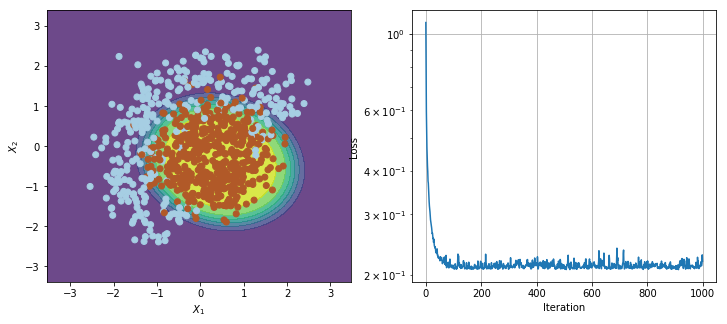

Final weigts: [ 4.59134556  1.5307786  -1.64482144 -1.87707562 -0.52310732 -2.39735978]


<Figure size 432x288 with 0 Axes>

In [282]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

G = np.zeros_like(w) # axillary vector

η = 0.1 # learning rate
ϵ = 1e-9 # division by zero avoidance term
α = 0.9 # forgeting parameter

batch_size = 50 # Batch size

# Define the vector to store the values of the loss function for plotting
rmsprop_loss = np.zeros(n_iter)

# Start a new figure
plt.figure(figsize=(12, 5))

# Iterate through the loss function and update the weights vector on each iteration
for i in range(n_iter):
    # Choose the random indicies of the training examples
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    # Compute the loss function value
    rmsprop_loss[i] = compute_loss(X_expanded, y, w)

    # Compute the approximation of the gradient vector based on the current batch
    g = compute_grad(X_expanded[ind, :], y[ind], w)
    
    # Compute the axillary vector
    G = α*G + (1-α)*(g**2)

    # Update weight vector by subtracting the gradient with the momentum
    w = w - η * g / np.sqrt(G + ϵ)

visualize(X, y, w, rmsprop_loss)
print('Final weigts:', w)

# [ 4.35006514  1.70950879 -1.60635337 -2.00897105 -0.89500995 -2.16298418]
plt.clf()


<Figure size 864x360 with 0 Axes>

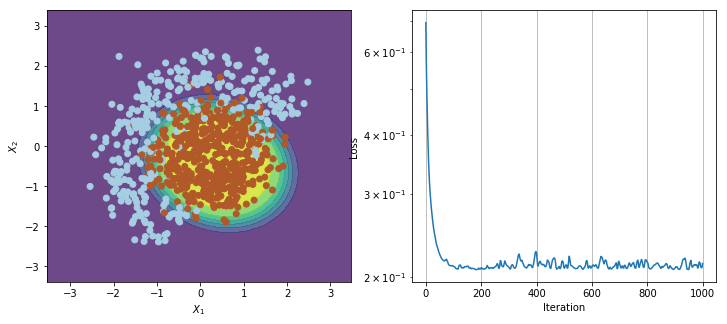

Final weigts: [ 4.44124144  1.4119737  -1.79859381 -2.04675374 -0.60917307 -2.35614086]


<Figure size 432x288 with 0 Axes>

In [283]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 0])

ν = np.zeros_like(w) # axillary vector 1
m = np.zeros_like(w) # axillary vector 1

η = 0.1 # learning rate
ϵ = 1e-8 # division by zero avoidance term
β1 = 0.900 # forgeting parameter
β2 = 0.999 # second Adam parameter

batch_size = 50 # Batch size

# Define the vector to store the values of the loss function for plotting
adam_loss = np.zeros(n_iter)

# Start a new figure
plt.figure(figsize=(12, 5))

# Iterate through the loss function and update the weights vector on each iteration
for i in range(n_iter):
    # Choose the random indicies of the training examples
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    # Compute the loss function value
    adam_loss[i] = compute_loss(X_expanded, y, w)

    # Compute the approximation of the gradient vector based on the current batch
    g = compute_grad(X_expanded[ind, :], y[ind], w)
    
    # Compute the axillary vectors
    m = β1*m + (1-β1)*g # Update biased first moment estimate
    ν = β2*ν + (1-β2)*(g**2) # Update biased second raw moment estimate    
    m_hat = m / (1 - (β1**(i+1))) # Compute bias-corrected first moment estimate
    ν_hat = ν / (1 - (β2**(i+1))) # Compute bias-corrected second raw moment estimate
    
    w = w - η * m_hat / (np.sqrt(ν_hat) + ϵ) # Update parameter vector

visualize(X, y, w, adam_loss)
print('Final weigts:', w)

# [ 2.73117388  1.24373036 -1.19689803 -1.0963212  -0.73486328 -1.1107151 ]
plt.clf()


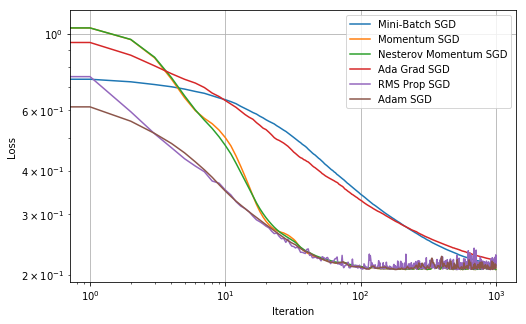

In [284]:
plt.figure(figsize=(8,5))
plt.plot(mb_loss, label='Mini-Batch SGD')
plt.plot(momentum_loss, label='Momentum SGD')
plt.plot(nesterov_momentum_loss, label='Nesterov Momentum SGD')
plt.plot(adagrad_loss, label='Ada Grad SGD')
plt.plot(rmsprop_loss, label='RMS Prop SGD')
plt.plot(adam_loss, label='Adam SGD')
plt.yscale('log'); plt.xscale('log')
plt.xlabel('Iteration'); plt.ylabel('Loss')
plt.grid(); plt.legend(); plt.show()